# Primeiros Passos com Ciência de Dados com Pokémons

__Workflow padrão de um projeto de ciência de dados:__

1 - __Defina o problema:__ Se Ciência de Dados, Big Data, aprendizado de máquina, análise preditiva, inteligência de negócios ou qualquer outra palavra hypada é a solução, qual é o problema? Problemas antes dos requisitos, requisitos antes das soluções, soluções antes do projeto e design antes da tecnologia. Com muita frequência, somos rápidos em pular na nova tecnologia, ferramenta ou algoritmo brilhante antes de determinar o problema real que estamos tentando resolver.

2 - __Recolha dados:__ John Naisbitt escreveu em seu livro de Megatrends de 1984 (sim, 1984) que estamos "nos afundando em dados, mas evitando conhecimento". Então, as chances são de que o(s) conjunto(s) de dados já existam em algum lugar, em algum formato. Interno, estruturado ou não estruturado, estático ou transmitido, objetivo ou subjetivo, etc. Como diz o ditado, você não precisa reinventar a roda, você só precisa saber onde encontrá-la, transformando "dados sujos" em "dados limpos".

3 - __Prepare os dados para consumo:__ Essa etapa é geralmente chamada de *data wrangling*, um processo necessário para transformar dados “selvagens” em dados “gerenciáveis”. Ela inclui a implementação de arquiteturas de dados para armazenamento e processamento, desenvolvimento de padrões de controle de dados para qualidade e controle, extração de dados (por exemplo, ETL e web scraping) e limpeza de dados para identificar pontos de dados aberrantes, ausentes ou outliers.

4 - __Análise Exploratória de Dados (EDA):__ Qualquer pessoa que tenha trabalhado com dados já sabe, garbage-in, garbage-out (GIGO). Portanto, é importante implantar estatísticas descritivas e gráficas para procurar possíveis problemas, padrões, classificações, correlações e comparações no conjunto de dados. Além disso, a categorização de dados (ou seja, qualitativa vs quantitativa) também é importante para entender e selecionar o teste de hipótese ou modelo de dados correto.

5 - __Modelagem dos Dados:__ Como a estatística descritiva e inferencial, a modelagem de dados pode resumir os dados ou prever resultados futuros. Seu conjunto de dados e resultados esperados, determinarão os algoritmos disponíveis para uso. É importante lembrar que os algoritmos são ferramentas e não varinhas mágicas ou balas de prata. Você ainda deve ser o artesão que sabe como selecionar a ferramenta certa para o trabalho. Uma analogia seria pedir a alguém que lhe entregasse uma chave de fenda de Philips e lhe entregasse uma chave de fenda ou, pior ainda, um martelo. Na melhor das hipóteses, mostra uma completa falta de compreensão. Na pior das hipóteses, torna impossível concluir o projeto. O mesmo é verdade na modelagem de dados. O modelo errado pode levar a um desempenho ruim na melhor das hipóteses e a conclusão errada (que é usada como inteligência acionável) na pior das hipóteses.

6 - __Validação e Implementação do Modelo:__ Validar e implementar seu modelo de dados: depois de treinar seu modelo com base em um subconjunto de seus dados, é hora de testar seu modelo. Isso ajuda a garantir que você não tenha realizado overfitting em seu modelo ou o tenha tornado tão específico para o subconjunto selecionado, que ele não se encaixa com precisão em outro subconjunto do mesmo conjunto de dados. Nesta etapa, determinamos se nosso modelo ajusta, generaliza ou ajusta nosso conjunto de dados.

7 - __Optimização e Estratégia:__ Este é o passo do "homem biônico", onde você repete o processo para torná-lo melhor, mais forte e mais rápido do que era antes. Como cientista de dados, sua estratégia deve ser terceirizar as operações do desenvolvedor e o pipeline de aplicativos, para que você tenha mais tempo para se concentrar nas recomendações e no design. Uma vez que você é capaz de empacotar suas idéias, isso se torna sua taxa de "troca de moeda".

# 1. Definição do problema:

Podemos resumir nosso problema em: __Squirtle, Bulbassauro ou Charmander?__

Agora que você respondeu essa pergunta, diga-me: qual dos três é, estatisticamente, melhor combatendo outros determinados pokémons?

Para fazer esta conta necessitamos de um histórico de lutas destes três pokémons com diversos outros pokémons, analisando os resultados e, talvez, calcular a média de vitórias e derrotas de cada um. Parece simples, bora complicar um pouco.

Digamos que agora queremos, dentro dos 800 pokémons existentes, calcular a probabilidade do pokémon *X* ganhar do pokémon *Y*, sendo que não temos todo o histórico de lutas contendo todas as permutações possíveis de lutas, mas temos as informações características invididuais de todos os pokémons. E agora?

__*DATA SCIENCE, HELP ME!*__



# 2. Recolher os dados:

Já temos todos os *.csv*. Dessa vez vai ser fácil, mas num projeto na *vida real* nem sempre é tão simples assim, coletar dados não é algo trivial - pelo menos existem diversas formas de se fazer.



# 3. Preparar dados para consumo:

Por incrível que pareça, essa etapa e a seguinte costumam ser as de maiores duração e mais complicadas.

Primeiramente, bora conhecer os dados. Shall we?

In [1]:
import numpy as np # álgebra linear
import pandas as pd # processamento de dados, arquivo CSV I/O

import matplotlib.pyplot as plt # plots bonitos
import seaborn as sns # mais plots bonitos

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## 3.1 Meet & Greet com os dados

### Introduzindo Pandas

In [2]:
# leitura de csvs com a bib Pandas

combats = pd.read_csv('combats.csv')
validation  = pd.read_csv('tests.csv')
data  = pd.read_csv('pokemon.csv')

In [3]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [4]:
validation.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [5]:
combats.shape

(50000, 3)

In [6]:
validation.shape

(10000, 2)

In [7]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [9]:
data.shape

(800, 12)

In [10]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [11]:
series = data.Defense
print(type(series))

series = data['Defense']
print(type(series))

series = data.loc[:,'Defense']
print(type(series))

series[0:10]

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0     49
1     63
2     83
3    123
4     43
5     58
6     78
7    111
8     78
9     65
Name: Defense, dtype: int64

In [12]:
data_frame = data[['Name', 'Attack','Defense']]
print(type(data_frame))
data_frame.head()

<class 'pandas.core.frame.DataFrame'>


,Name,Attack,Defense
0,Bulbasaur,49,49
1,Ivysaur,62,63
2,Venusaur,82,83
3,Mega Venusaur,100,123
4,Charmander,52,43


In [13]:
x = data['Defense'] > 200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [14]:
data[data['Attack'] > 100]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False
64,65,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
74,75,Machamp,Fighting,NaN,90,130,80,65,85,55,1,False
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,1,False


In [15]:
data[(data['Defense']>200) & (data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [16]:
#threshold = sum(data.Speed)/len(data.Speed)
threshold = data.Speed.mean()

data['speed_level'] = ['high' if speed > threshold else 'low' for speed in data.Speed]
data.loc[:10,["speed_level","Speed"]]

,speed_level,Speed
0,low,45
1,low,60
2,high,80
3,high,80
4,low,65
5,high,80
6,high,100
7,high,100
8,high,100
9,low,43


In [17]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [18]:
data = data.drop('speed_level', axis = 1)

In [19]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## 3.2 Data cleaning

In [20]:
data.isna().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
data['Type 2'].fillna('None', inplace=True)

In [22]:
# o nome não é um bom preditor para o target, então não nos preocuparemos com este caso.

data[data.Name.isna() == True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,None,65,105,60,60,70,95,1,False


Caso tivéssemos números faltando em Attack, Defense ou outras variáveis numéricas, poderíamos completar os dados faltantes com a média do grupo, mediana, moda, média ponderada analisando outros stats, entre outros. É trabalho do cientista de dados saber quais as melhores estatísticas para suprir os faltantes.

In [23]:
# feature engineering

# poder total
data['Total Power'] = data.Attack + data.Defense
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,95


# 4. Exploratory Data Analysis (EDA)

Aqui é a etapa em que vemos os gráficos bonitos, estatísticas e outras coisas correlacionadas.

## 4.1 Plotando gráficos com Matplotlib e Seaborn

Text(0.5,1,'Line Plot')

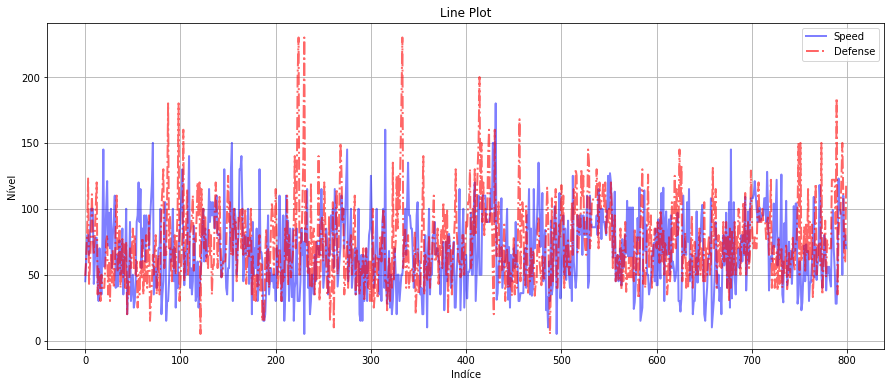

In [24]:
plt.figure(figsize=(15,6))
data.Speed.plot(kind = 'line', color = 'blue',label = 'Speed',linewidth=2,alpha = 0.5,grid = True)
data.Defense.plot(color = 'red',label = 'Defense',linewidth=2, alpha = 0.6,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Indíce')              # label = name of label
plt.ylabel('Nível')
plt.title('Line Plot')            # title = title of plot

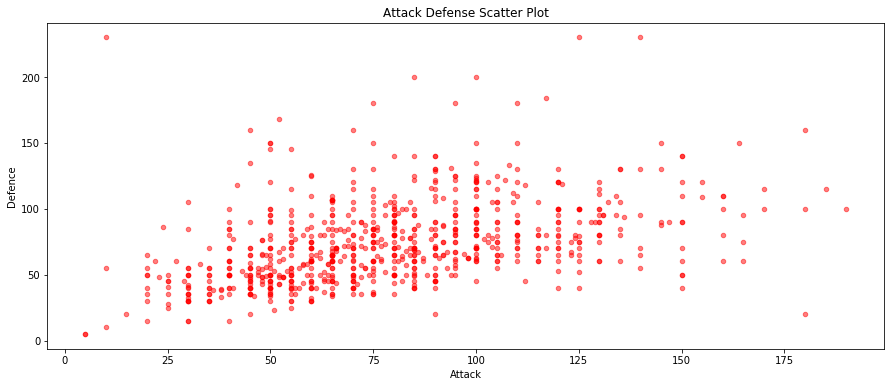

In [25]:
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red', figsize = (15,6))
plt.xlabel('Attack')
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')
plt.show()

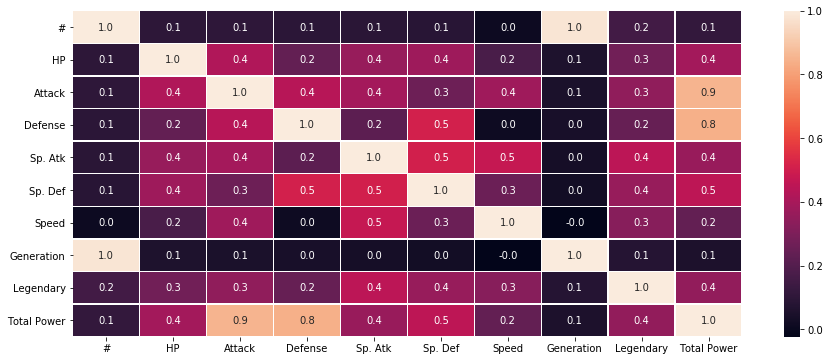

In [26]:
plt.figure(figsize = (15,6))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = '.1f')
plt.show()

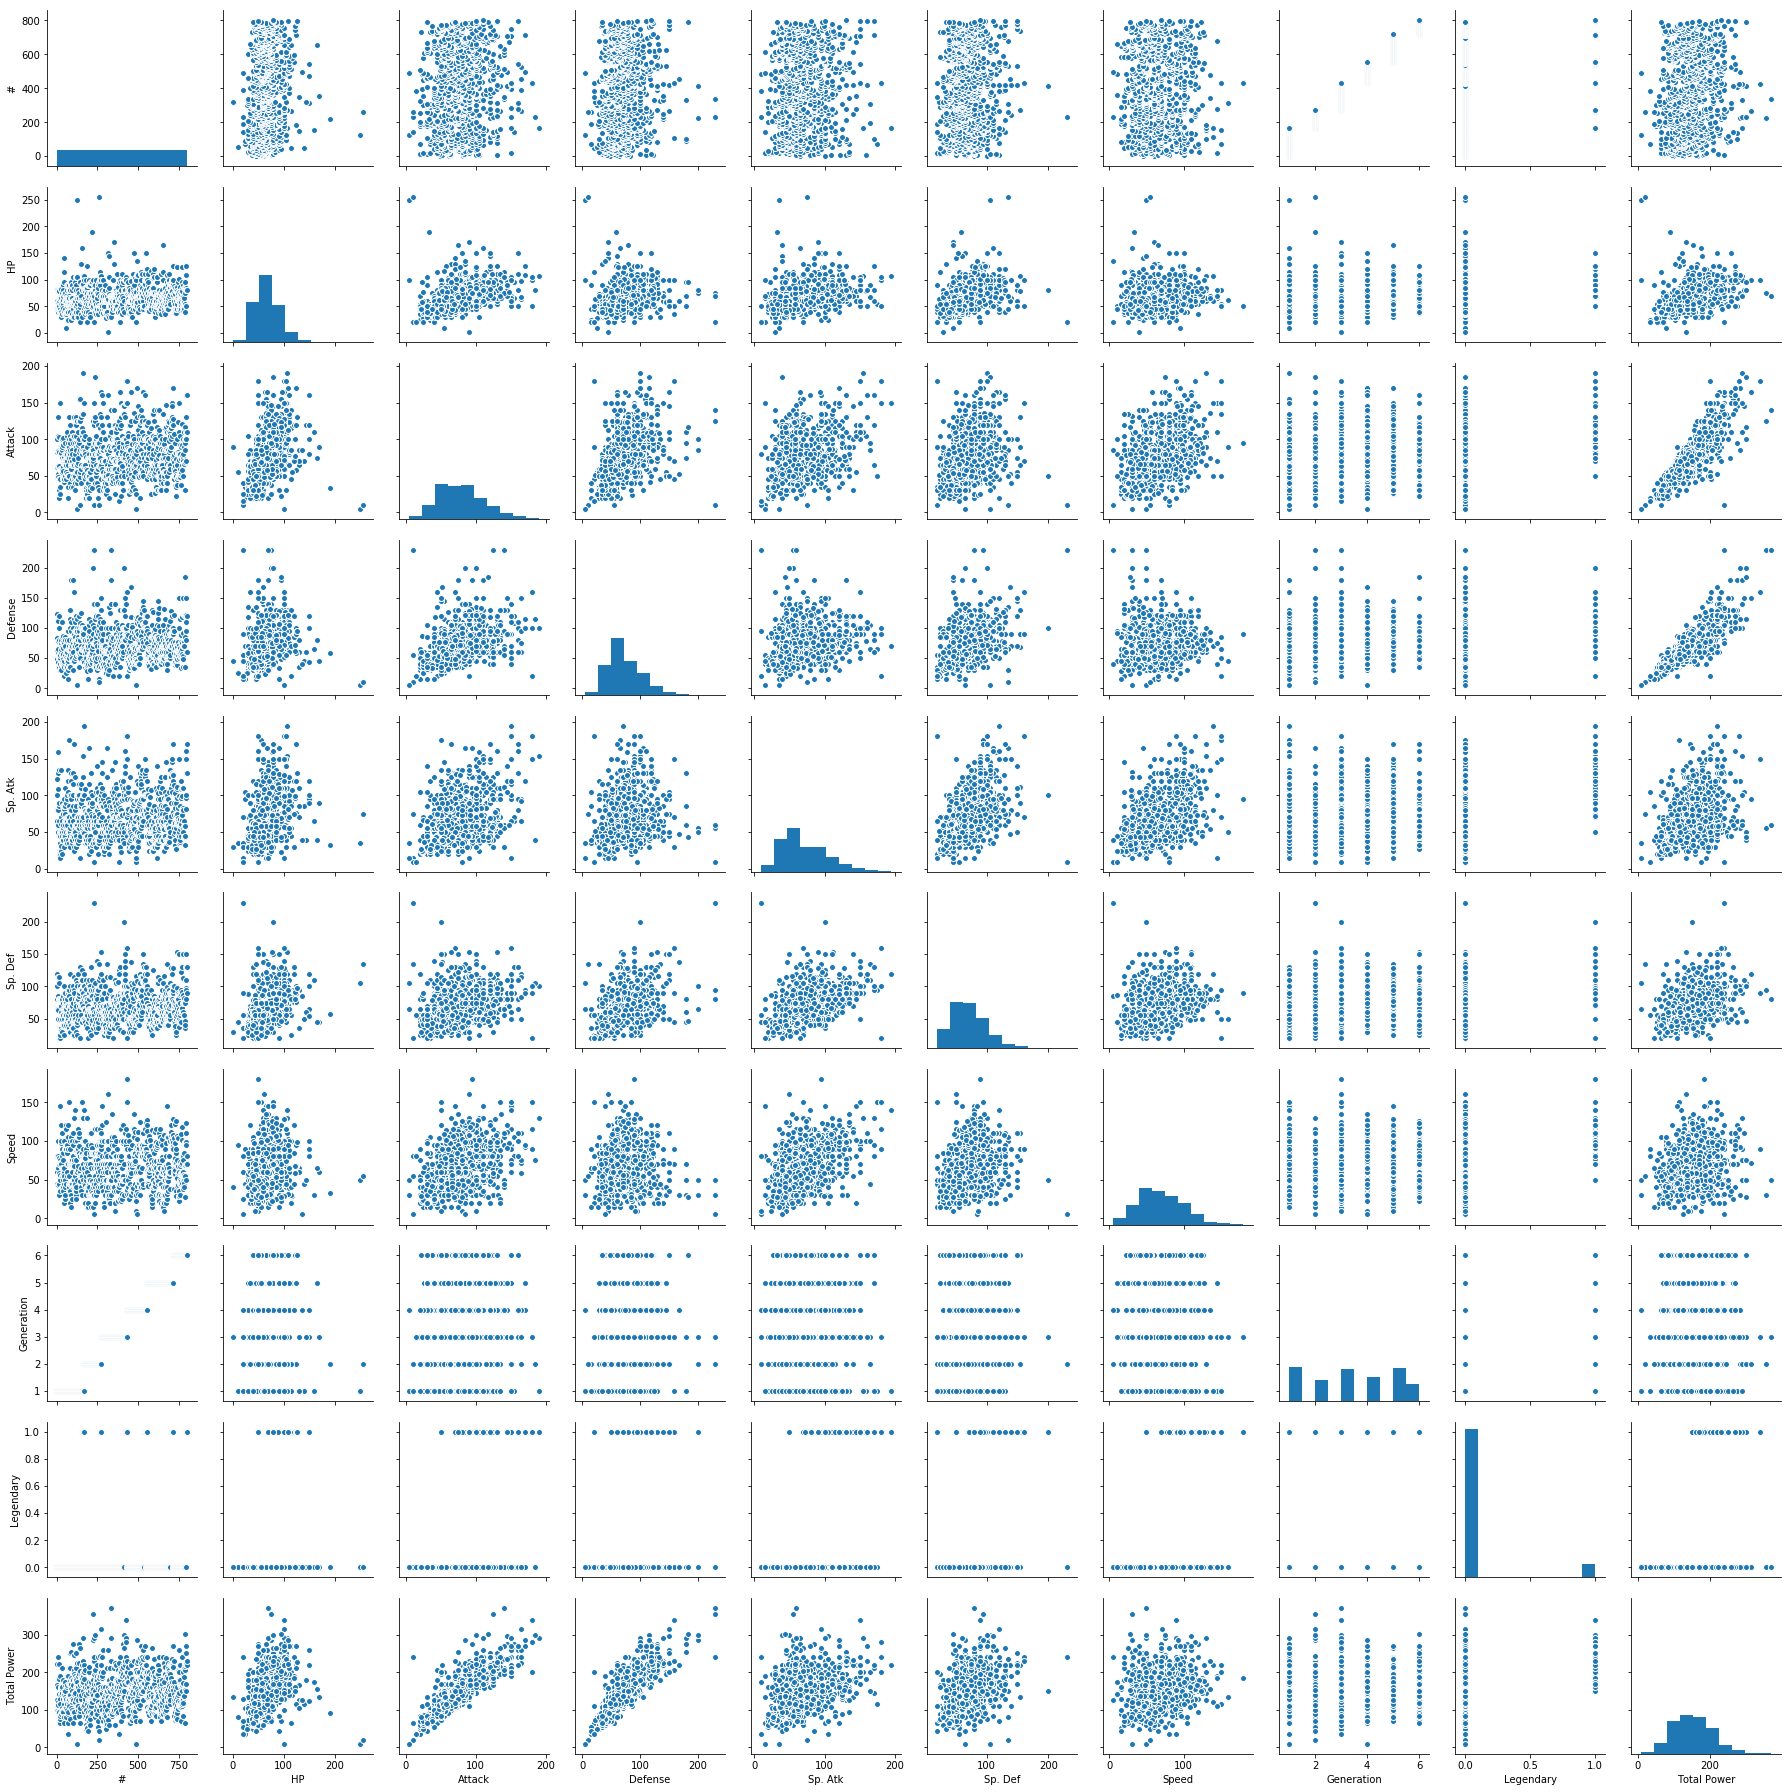

In [27]:
plt.figure(figsize = (10,3))
sns.pairplot(data)
plt.show()

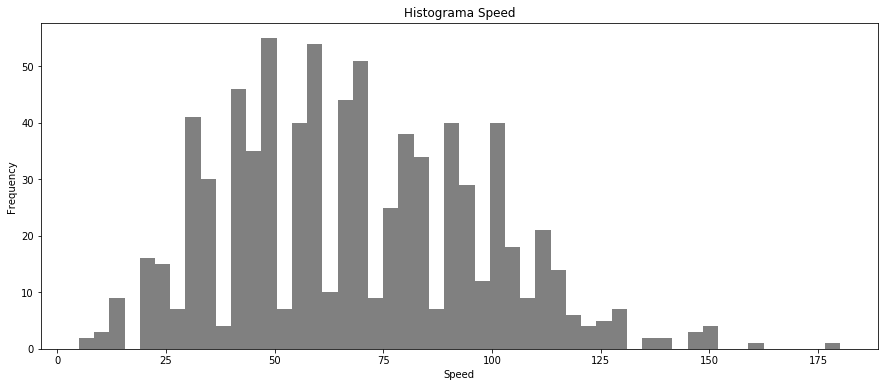

In [28]:
data.Speed.plot(kind = 'hist',color='gray',bins = 50,figsize = (15,6))
plt.xlabel('Speed')
plt.title('Histograma Speed')
plt.show()

In [29]:
data['Type 1'].value_counts(dropna =False) 

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

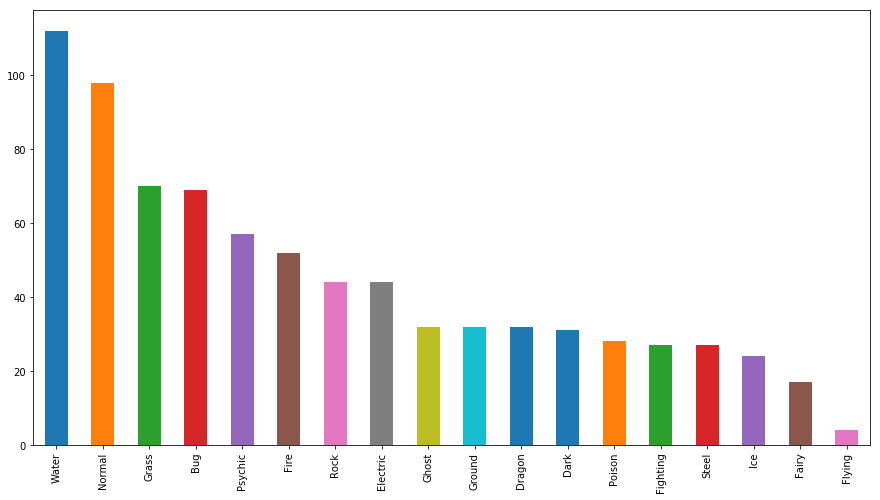

In [30]:
plt.figure(figsize = (15,8))
(data['Type 1'].value_counts(dropna =False)).plot(kind = 'bar')

In [31]:
combinedTypes = data['Type 1'] + '/' + data['Type 2']

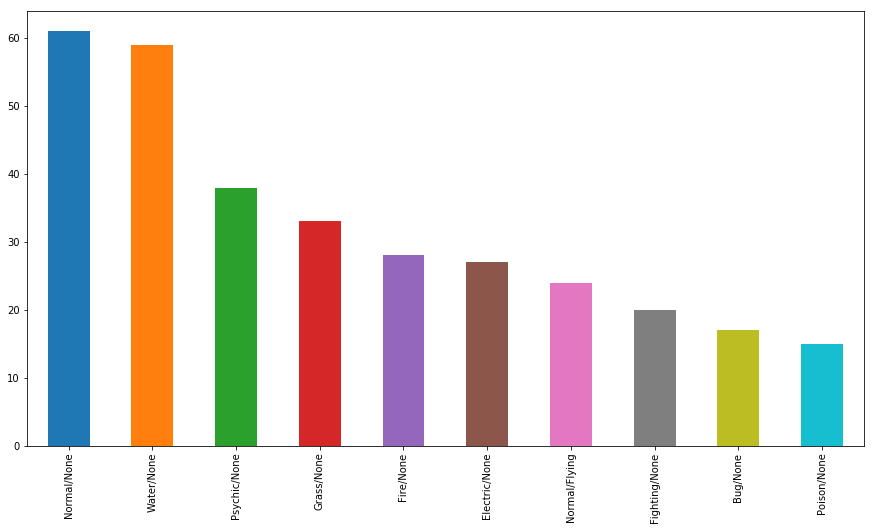

In [32]:
plt.figure(figsize = (15,8))
(combinedTypes.value_counts()[0:10]).plot(kind = 'bar')

In [33]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total Power
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,152.843750
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,53.980661
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,10.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,112.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,150.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,188.250000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,370.000000


# 5. Modelagem preditiva

## 5.1 Criando a tabela de treino

In [34]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [35]:
data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,95
5,6,Charmeleon,Fire,None,58,64,58,80,65,80,1,False,122
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,162
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,241
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,182
9,10,Squirtle,Water,None,44,48,65,50,64,43,1,False,113


Precisamos sintetizar as duas tabelas em uma única.

Para problemas de __classificação__ (1 ou 0, sim ou não, primeiro ou segundo), um dataset de treino costuma ter uma coluna com o *Target (y)*, classificada da forma binária e outras colunas contendo variáveis preditoras.

In [36]:
train = combats.copy()

In [37]:
train.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [38]:
train['is_first_winner'] = train.apply(lambda x: 1 if x['Winner'] == x['First_pokemon'] else 0, axis=1)
train.drop('Winner', axis=1, inplace=True)

In [39]:
train.head()

,First_pokemon,Second_pokemon,is_first_winner
0,266,298,0
1,702,701,0
2,191,668,0
3,237,683,0
4,151,231,1


In [40]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,95


In [41]:
label = LabelEncoder()
 
data['Type 1 Code'] = label.fit_transform(data['Type 1'])
data['Type 2 Code'] = label.fit_transform(data['Type 2'])

In [42]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Power,Type 1 Code,Type 2 Code
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98,9,14
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125,9,14
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165,9,14
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223,9,14
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,95,6,12


In [43]:
data = data.drop(['Name', 'Generation', 'Legendary', 'Type 1', 'Type 2'], axis=1)

In [44]:
data.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Power,Type 1 Code,Type 2 Code
0,1,45,49,49,65,65,45,98,9,14
1,2,60,62,63,80,80,60,125,9,14
2,3,80,82,83,100,100,80,165,9,14
3,4,80,100,123,122,120,80,223,9,14
4,5,39,52,43,60,50,65,95,6,12


In [45]:
hp_dict        = dict(zip(data['#'], data['HP']))
type1_dic      = dict(zip(data['#'], data['Type 1 Code']))
type2_dic      = dict(zip(data['#'], data['Type 2 Code']))
atk_dict       = dict(zip(data['#'], data['Attack']))
def_dict       = dict(zip(data['#'], data['Defense']))
sp_atk_dict    = dict(zip(data['#'], data['Sp. Atk']))
sp_def_dict    = dict(zip(data['#'], data['Sp. Def']))
speed_dict     = dict(zip(data['#'], data['Speed']))
total_dict     = dict(zip(data['#'], data['Total Power']))

In [46]:
train['first_hp'] = train['First_pokemon'].replace(hp_dict)
train['first_atk'] = train['First_pokemon'].replace(atk_dict)
train['first_def'] = train['First_pokemon'].replace(def_dict)
train['first_sp.atk'] = train['First_pokemon'].replace(sp_atk_dict)
train['first_sp.def'] = train['First_pokemon'].replace(sp_def_dict)
train['first_speed'] = train['First_pokemon'].replace(speed_dict)
train['first_total'] = train['First_pokemon'].replace(total_dict)
train['first_type1'] = train['First_pokemon'].replace(type1_dic)
train['first_type2'] = train['First_pokemon'].replace(type2_dic)

train['second_hp'] = train['Second_pokemon'].replace(hp_dict)
train['second_atk'] = train['Second_pokemon'].replace(atk_dict)
train['second_def'] = train['Second_pokemon'].replace(def_dict)
train['second_sp.atk'] = train['Second_pokemon'].replace(sp_atk_dict)
train['second_sp.def'] = train['Second_pokemon'].replace(sp_def_dict)
train['second_speed'] = train['Second_pokemon'].replace(speed_dict)
train['second_total'] = train['Second_pokemon'].replace(total_dict)
train['second_type1'] = train['Second_pokemon'].replace(type1_dic)
train['second_type2'] = train['Second_pokemon'].replace(type2_dic)

In [47]:
train.drop(['First_pokemon', 'Second_pokemon'], axis=1, inplace=True)

In [48]:
train.head(10)

,is_first_winner,first_hp,first_atk,first_def,first_sp.atk,first_sp.def,first_speed,first_total,first_type1,first_type2,second_hp,second_atk,second_def,second_sp.atk,second_sp.def,second_speed,second_total,second_type1,second_type2
0,0,50,64,50,45,50,41,114,15,10,70,70,40,60,40,60,110,9,1
1,0,91,90,72,90,129,108,162,9,5,91,129,90,72,90,108,219,15,5
2,0,55,40,85,80,105,40,125,4,7,75,75,75,125,95,40,150,14,12
3,0,40,40,40,70,40,20,80,6,12,77,120,90,60,90,48,210,2,12
4,1,70,60,125,115,70,55,185,15,18,20,10,230,10,230,5,240,0,16
5,1,50,47,50,57,50,65,97,0,3,60,50,150,50,150,60,200,16,8
6,0,40,50,45,70,45,70,95,14,7,65,50,35,115,95,95,85,11,15
7,0,70,80,50,35,35,35,130,5,12,150,100,120,100,120,90,220,8,2
8,0,50,65,90,35,35,15,155,0,12,50,53,62,58,63,44,115,17,12
9,0,40,30,30,55,30,85,60,17,7,35,55,40,50,50,90,95,3,12


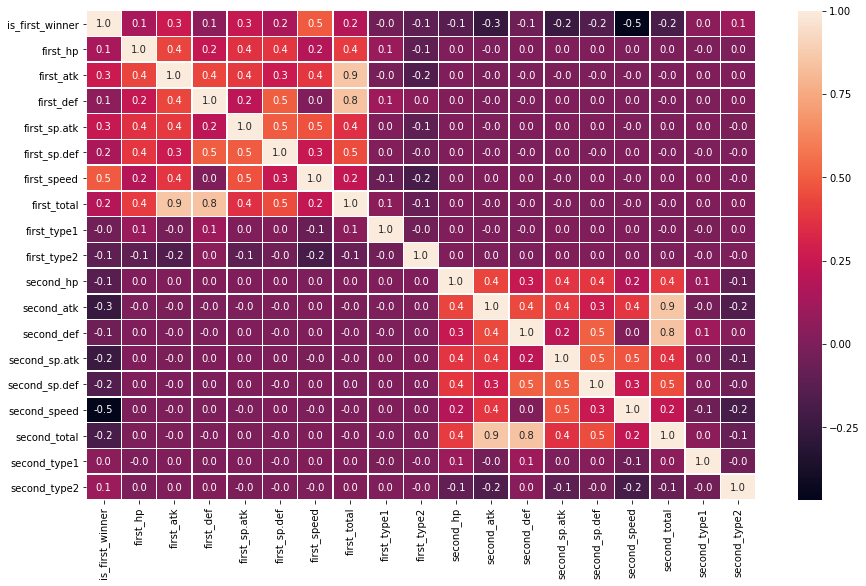

In [49]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(), annot = True, linewidths=.5, fmt = '.1f')
plt.show()

Dividindo a tabela em treino e teste.

In [50]:
y = train['is_first_winner']
X = train.drop('is_first_winner', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [51]:
print('Shape de Treino:',X_train.shape)
print('Shape de Treino:',y_train.shape)
print('Shape de Teste :',X_test.shape)
print('Shape de Teste :',y_test.shape)

Shape de Treino: (37500, 18)
Shape de Treino: (37500,)
Shape de Teste : (12500, 18)
Shape de Teste : (12500,)


## 4.2 Rodando um modelo preditivo!

Existem diversos tipos de estimativas para ver a eficácia do modelo. Iremos utilizar a acurácia por ser a mais simples.

### 4.21 Regressão Logística

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_logreg = round(logreg.score(X_test, y_test) * 100, 2)
print('Acurácia LogisticRegression:', acc_logreg, '%')

Acurácia LogisticRegression: 88.7 %


### 4.22 KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print('Acurácia KNN:', acc_knn, '%')

Acurácia KNN: 85.6 %


### 4.43 Perceptron

In [54]:
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
print('Acurácia Perceptron:', acc_perceptron, '%')

Acurácia Perceptron: 84.39 %


### 4.44 Decision Tree

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decisionTree = round(decision_tree.score(X_test, y_test) * 100, 2)
print('Acurácia DecisionTreeClassifier:', acc_decisionTree, '%')

Acurácia DecisionTreeClassifier: 92.18 %


### 4.45 Random Forest

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

acc_randomForest = round(random_forest.score(X_test, y_test) * 100, 2)
print('Acurácia RandomForestClassifier:', acc_randomForest, '%')

Acurácia RandomForestClassifier: 94.3 %


## 4.3 Sumarizando 

In [57]:
mod = ['Logreg', 'KNN', 'Perceptron', 'Decision Tree', 'Random Forest']
acc = [acc_logreg, acc_knn, acc_perceptron,acc_decisionTree, acc_randomForest]

In [58]:
summary = pd.DataFrame()
summary['Modelo'] = mod
summary['Accuracy'] = acc

In [59]:
summary.sort_values('Accuracy', ascending=False)

,Modelo,Accuracy
4,Random Forest,94.30
3,Decision Tree,92.18
0,Logreg,88.70
1,KNN,85.60
2,Perceptron,84.39


__Random Forest for the win.__

In [60]:
# but we want to know more about the importance features
effective = pd.DataFrame()
effective['feature_name'] = X.columns.tolist()
effective['feature_importance'] = random_forest.feature_importances_
effective = effective.sort_values(by='feature_importance', ascending=False)
effective

,feature_name,feature_importance
5,first_speed,0.295495
14,second_speed,0.285410
10,second_atk,0.040343
1,first_atk,0.038592
12,second_sp.atk,0.037487
3,first_sp.atk,0.035624
6,first_total,0.030154
15,second_total,0.027586
0,first_hp,0.026502
9,second_hp,0.024619
